# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['NA18999', 'NA18960', 'NA18976', 'NA19081', 'NA18987', 'NA18985', 'NA19077', 'NA19006', 'NA18948', 'NA19009', 'NA18959', 'NA19060', 'NA19091', 'NA18965', 'NA19059', 'NA19003', 'NA19000', 'NA18941', 'NA19076', 'NA19080', 'NA18994', 'NA18973', 'NA18974', 'NA18961', 'NA19063', 'NA18979', 'NA18947', 'NA19087', 'NA18981', 'NA19064', 'NA18945', 'NA19082', 'NA19070', 'NA18972', 'NA18949', 'NA18975', 'NA18989', 'NA18967', 'NA19083', 'NA18997', 'NA18966', 'NA19090', 'NA18983', 'NA18952', 'NA19062', 'NA19012', 'NA18955', 'NA18940', 'NA19004', 'NA18970', 'NA18946', 'NA18971', 'NA18988', 'NA18977', 'NA18980', 'NA18939', 'NA19088', 'NA18957', 'NA19065', 'NA19078', 'NA19074', 'NA18968', 'NA18982', 'NA19011', 'NA18995', 'NA19054', 'NA18990', 'NA18978', 'NA18943', 'NA19066', 'NA18953', 'NA19056', 'NA18962', 'NA19072', 'NA19068', 'NA18964', 'NA19067', 'NA18951', 'NA18992', 'NA19057', 'NA18963', 'NA19089', 'NA18984', 'NA18956', 'NA19002', 'NA18993', 'NA19055', 'NA18969', 'NA19005', 'NA19007', 'NA19010', 'NA19079', 'NA18991', 'NA18986', 'NA18942', 'NA19058', 'NA18944', 'NA19084', 'NA19075', 'NA18950', 'NA19086', 'NA19085', 'NA19001', 'NA18954', 'NA18998']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/JPT/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/JPT/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998,gene
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,TARDBP
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,TARDBP
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,TARDBP
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA19058,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,5,19,3,5,8,5,24,6,1,6,...,5,23,1,5,2,3,7,4,19,6
ANG,6,0,5,1,6,1,5,0,0,0,...,1,0,1,0,4,1,2,6,1,0
ATXN2,6,0,7,0,4,1,3,13,11,1,...,3,2,2,4,9,15,7,2,6,5
C19ORF12,4,12,7,6,11,8,7,9,9,13,...,8,5,4,12,5,7,12,14,19,5
C9ORF72,14,1,2,13,12,2,23,36,23,0,...,35,25,33,17,24,9,3,13,4,3


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
NA18999,10.353535
NA18960,10.969697
NA18976,11.010101
NA19081,9.575758
NA18987,7.191919


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA19058,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998
0,10.353535,10.969697,11.010101,9.575758,7.191919,12.565657,9.262626,7.373737,5.909091,9.050505,...,6.30303,5.79798,9.141414,7.282828,6.616162,5.585859,5.373737,9.363636,8.969697,8.434343


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA19058,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998
mean99,10.353535,10.969697,11.010101,9.575758,7.191919,12.565657,9.262626,7.373737,5.909091,9.050505,...,6.30303,5.79798,9.141414,7.282828,6.616162,5.585859,5.373737,9.363636,8.969697,8.434343


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA19058,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000
mean,28.472222,30.166667,30.277778,26.333333,19.777778,34.555556,25.472222,20.277778,16.250000,24.888889,...,17.333333,15.944444,25.138889,20.027778,18.194444,15.361111,14.777778,25.75000,24.666667,23.194444
std,98.505833,87.913431,83.443603,89.276137,63.321904,126.413255,90.146384,63.546883,40.670365,80.092367,...,41.646814,31.957958,90.454141,65.658635,40.200796,29.648563,32.100833,79.52695,87.274608,72.780225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.750000,1.750000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA19058,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998
ALS2,5.000000,19.000000,3.000000,5.000000,8.000000,5.000000,24.000000,6.000000,1.000000,6.000000,...,5.000000,23.000000,1.000000,5.000000,2.000000,3.000000,7.000000,4.000000,19.000000,6.000000
ANG,6.000000,0.000000,5.000000,1.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000,2.000000,6.000000,1.000000,0.000000
ATXN2,6.000000,0.000000,7.000000,0.000000,4.000000,1.000000,3.000000,13.000000,11.000000,1.000000,...,3.000000,2.000000,2.000000,4.000000,9.000000,15.000000,7.000000,2.000000,6.000000,5.000000
C19ORF12,4.000000,12.000000,7.000000,6.000000,11.000000,8.000000,7.000000,9.000000,9.000000,13.000000,...,8.000000,5.000000,4.000000,12.000000,5.000000,7.000000,12.000000,14.000000,19.000000,5.000000
C9ORF72,14.000000,1.000000,2.000000,13.000000,12.000000,2.000000,23.000000,36.000000,23.000000,0.000000,...,35.000000,25.000000,33.000000,17.000000,24.000000,9.000000,3.000000,13.000000,4.000000,3.000000
CHCHD10,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
CHMP2B,6.000000,12.000000,15.000000,6.000000,15.000000,8.000000,8.000000,6.000000,7.000000,14.000000,...,1.000000,2.000000,14.000000,14.000000,6.000000,1.000000,6.000000,10.000000,9.000000,6.000000
CHRNA3,20.000000,30.000000,21.000000,13.000000,5.000000,5.000000,18.000000,5.000000,5.000000,22.000000,...,18.000000,36.000000,14.000000,0.000000,20.000000,18.000000,13.000000,10.000000,18.000000,20.000000
CREST,90.000000,1.000000,2.000000,2.000000,2.000000,89.000000,18.000000,3.000000,1.000000,3.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,88.000000,3.000000,1.000000,2.000000,4.000000
DAO,4.000000,8.000000,0.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.000000,2.000000,...,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,105.0,11.723810,9.115177,1.0,5.0,7.0,21.0,40.0
ANG,105.0,2.952381,3.064627,0.0,1.0,2.0,5.0,14.0
ATXN2,105.0,7.933333,5.882285,0.0,3.0,6.0,12.0,24.0
C19ORF12,105.0,8.371429,3.770475,0.0,5.0,8.0,11.0,19.0
C9ORF72,105.0,13.180952,9.254709,0.0,4.0,13.0,21.0,36.0
CHCHD10,105.0,0.628571,0.682996,0.0,0.0,1.0,1.0,3.0
CHMP2B,105.0,8.723810,4.979758,0.0,6.0,8.0,11.0,28.0
CHRNA3,105.0,17.485714,9.296519,0.0,15.0,18.0,20.0,38.0
CREST,105.0,19.685714,33.410994,0.0,2.0,3.0,17.0,107.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA18954,NA18998,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,5,19,3,5,8,5,24,6,1,6,...,19,6,105.0,11.723810,9.115177,1.0,5.0,7.0,21.0,40.0
ANG,6,0,5,1,6,1,5,0,0,0,...,1,0,105.0,2.952381,3.064627,0.0,1.0,2.0,5.0,14.0
ATXN2,6,0,7,0,4,1,3,13,11,1,...,6,5,105.0,7.933333,5.882285,0.0,3.0,6.0,12.0,24.0
C19ORF12,4,12,7,6,11,8,7,9,9,13,...,19,5,105.0,8.371429,3.770475,0.0,5.0,8.0,11.0,19.0
C9ORF72,14,1,2,13,12,2,23,36,23,0,...,4,3,105.0,13.180952,9.254709,0.0,4.0,13.0,21.0,36.0


In [23]:
rdf

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA18954,NA18998,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,5,19,3,5,8,5,24,6,1,6,...,19,6,105.0,11.723810,9.115177,1.0,5.0,7.0,21.0,40.0
ANG,6,0,5,1,6,1,5,0,0,0,...,1,0,105.0,2.952381,3.064627,0.0,1.0,2.0,5.0,14.0
ATXN2,6,0,7,0,4,1,3,13,11,1,...,6,5,105.0,7.933333,5.882285,0.0,3.0,6.0,12.0,24.0
C19ORF12,4,12,7,6,11,8,7,9,9,13,...,19,5,105.0,8.371429,3.770475,0.0,5.0,8.0,11.0,19.0
C9ORF72,14,1,2,13,12,2,23,36,23,0,...,4,3,105.0,13.180952,9.254709,0.0,4.0,13.0,21.0,36.0
CHCHD10,2,1,1,0,1,0,0,1,0,1,...,1,1,105.0,0.628571,0.682996,0.0,0.0,1.0,1.0,3.0
CHMP2B,6,12,15,6,15,8,8,6,7,14,...,9,6,105.0,8.723810,4.979758,0.0,6.0,8.0,11.0,28.0
CHRNA3,20,30,21,13,5,5,18,5,5,22,...,18,20,105.0,17.485714,9.296519,0.0,15.0,18.0,20.0,38.0
CREST,90,1,2,2,2,89,18,3,1,3,...,2,4,105.0,19.685714,33.410994,0.0,2.0,3.0,17.0,107.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,161
ANG,38
ATXN2,209
C19ORF12,61
C9ORF72,98
CHCHD10,6
CHMP2B,76
CHRNA3,105
CREST,186


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,3501
1,NEK1,595
2,FIG4,350
3,SETX,339
4,SPG11,305
5,ELP3,240
6,ATXN2,209
7,CREST,186
8,ALS2,161
9,VAPB,131


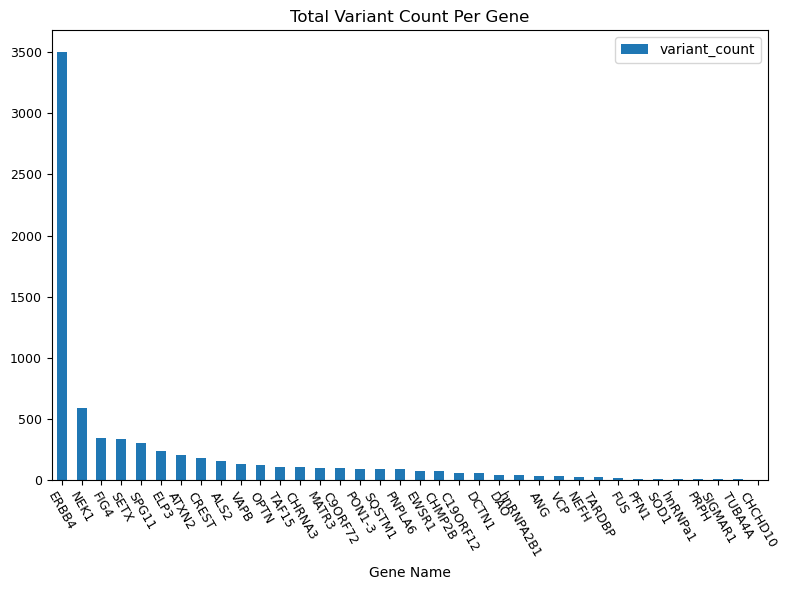

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,NA18999,1025
1,NA18960,1086
2,NA18976,1090
3,NA19081,948
4,NA18987,712


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(849.6571428571428), 210.5832481362285)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

21

In [39]:
len(bottom_genomes)

17

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,NA18999,NA18960,NA18976,NA19081,NA18987,NA18985,NA19077,NA19006,NA18948,NA19009,...,NA19058,NA18944,NA19084,NA19075,NA18950,NA19086,NA19085,NA19001,NA18954,NA18998
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,5,19,3,5,8,5,24,6,1,6,...,5,23,1,5,2,3,7,4,19,6
ANG,6,0,5,1,6,1,5,0,0,0,...,1,0,1,0,4,1,2,6,1,0
ATXN2,6,0,7,0,4,1,3,13,11,1,...,3,2,2,4,9,15,7,2,6,5
C19ORF12,4,12,7,6,11,8,7,9,9,13,...,8,5,4,12,5,7,12,14,19,5
C9ORF72,14,1,2,13,12,2,23,36,23,0,...,35,25,33,17,24,9,3,13,4,3


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,NA18960,NA18976,NA18985,NA18965,NA18981,NA18972,NA18949,NA18989,NA18952,NA18955,...,NA18970,NA18939,NA19065,NA18968,NA18978,NA18953,NA19089,NA18956,NA19007,NA18986
gene,,,,,,,,,,,,,,,,,,,,,
ERBB4,503,465,758,525,623,642,654,415,436,545,...,634,711,734,792,496,610,501,673,456,796
NEK1,185,189,4,186,187,186,7,320,192,189,...,188,14,195,9,187,7,188,191,188,186
FIG4,85,52,59,16,52,53,22,51,88,81,...,36,88,48,86,71,36,64,69,51,72
SETX,47,72,66,28,23,24,55,27,51,67,...,56,37,45,57,74,64,83,23,24,25
SPG11,54,118,94,60,5,5,93,6,97,47,...,5,2,5,8,6,94,9,8,94,61


In [46]:
tgdf_bot_genomes.head()

,NA18948,NA19080,NA18973,NA18979,NA18945,NA19090,NA18977,NA18980,NA19074,NA18962,NA18964,NA18969,NA19005,NA19058,NA18944,NA19086,NA19085
gene,,,,,,,,,,,,,,,,,
ERBB4,239,222,101,216,212,174,211,212,154,165,119,296,259,238,175,148,174
NEK1,5,6,7,4,4,3,6,4,186,4,5,3,6,44,5,6,7
FIG4,71,87,41,41,35,42,49,26,41,67,53,20,59,65,58,45,29
SETX,26,24,72,66,24,44,53,34,46,55,56,46,49,68,68,62,42
SPG11,7,3,4,5,3,6,3,6,5,7,3,4,6,5,5,3,91


## Plot stacked bar chart for top genes & top genomes

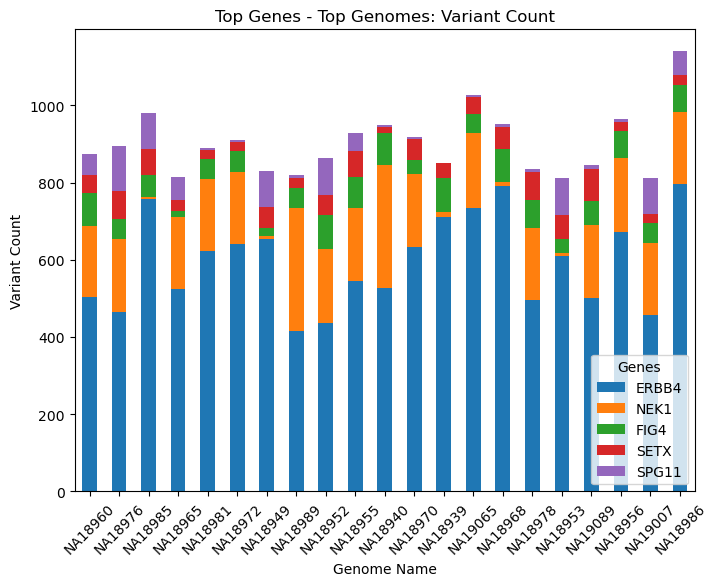

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

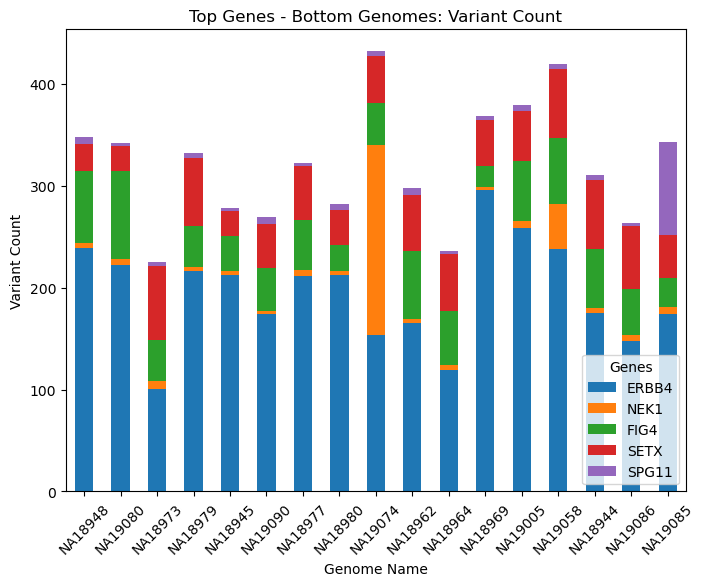

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()